In [1]:
%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from scipy.constants import c, m_e, e, epsilon_0, hbar
from scipy.ndimage import gaussian_filter

from qsa_pwfa.simulation import Simulation
from qsa_pwfa.inline_methods import get_density, get_field

n_plasma = 1e17 * 1e6
k_p_inv = (e**2 / m_e /  c**2  / epsilon_0 * n_plasma)**-0.5

In [2]:
"""
CASE 1

nb/n0 = 5
kp*sigma_r = 0.1
kp_sigma_z = 1
Lambda = 0.05
"""

# Beam 
n_b = 5
R_b = 0.1
ksi0 = 5
R_xi = 1

# plasma
L_xi = 18
L_r = 2.2

# grid
N_xi = 2048

d_xi = L_xi/N_xi
dr = 0.1*d_xi

N_r = int(np.ceil(L_r/dr / 4)*4)
L_r = N_r * dr
# n_b * (2*np.pi)**1.5 * (k_p_inv*R_b)**2 * (k_p_inv*R_xi) * 1e23 * e * 1e12

In [3]:
sim = Simulation(L_xi=L_xi, N_xi=N_xi, L_r=L_r, N_r=N_r)
sim.init_beam(n_b, R_b, ksi0, R_xi)

r_xi = np.zeros((sim.N_xi, sim.N_r))
vz_xi = np.zeros((sim.N_xi, sim.N_r))

r_xi[0] = sim.r
vz_xi[0] = sim.v_z
    
for i_xi in range(N_xi-1):
    sim.advance_xi(i_xi)
    r_xi[i_xi+1] = sim.r
    vz_xi[i_xi+1] = sim.v_z

<IPython.core.display.Javascript object>


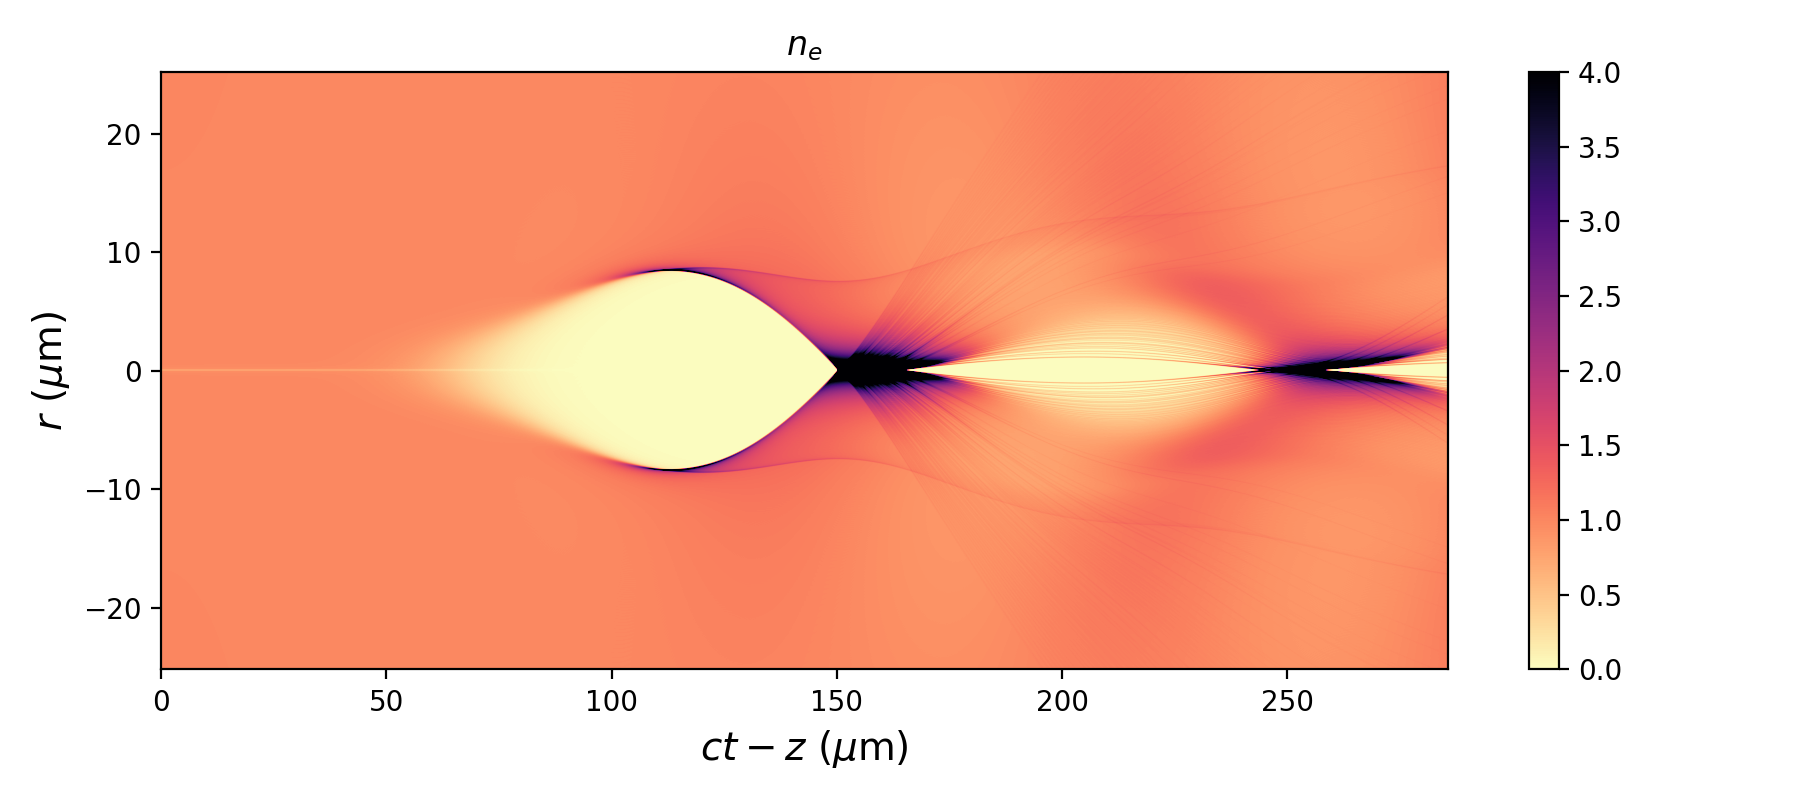

<ipython-input-14-f45861b1ee94>:31: RuntimeWarning: invalid value encountered in true_divide
  val = gaussian_filter(np.nan_to_num(field_dens/dens), 0.8)


<IPython.core.display.Javascript object>


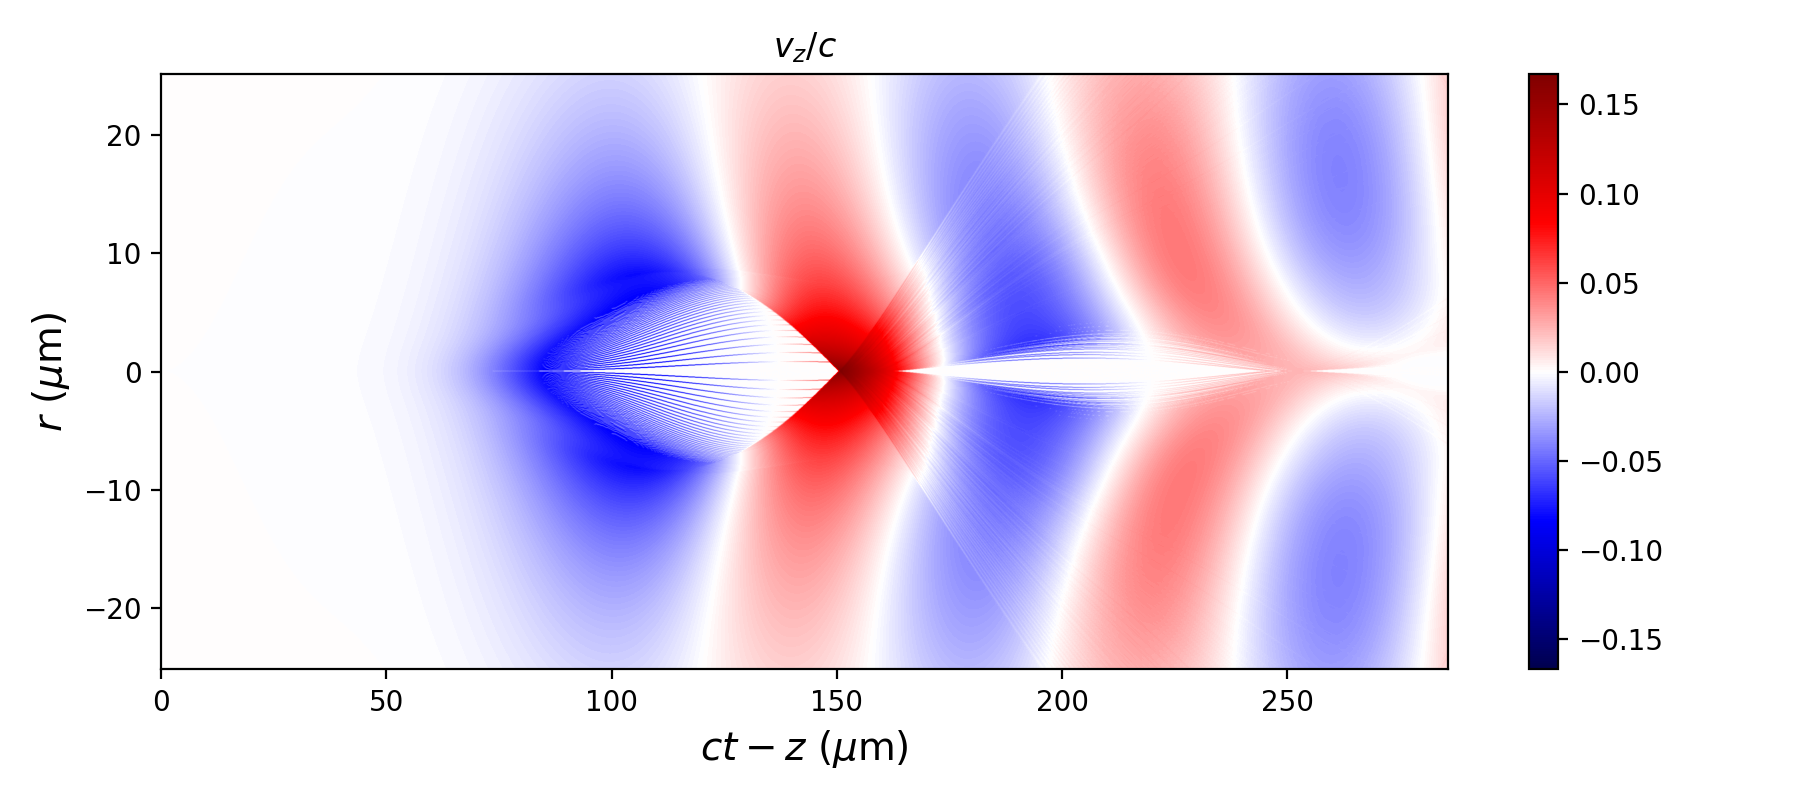

In [14]:
Nr_new = sim.N_r//2
dr_proj = L_r/Nr_new

dens = get_density(r_xi, vz_xi, sim.dV, dr_proj, Nr_new)
dens_ext = np.hstack((dens[:,1:][:,::-1], dens[:,1:]))

val = gaussian_filter(dens, 0.8)    
val_ext = np.hstack((val[:,1:][:,::-1], val[:,1:]))

ext = np.array([0, sim.L_xi, -sim.L_r, sim.L_r ]) * k_p_inv * 1e6

plt.figure(figsize=(9,4), tight_layout=True)

plt.imshow(val_ext.T,
           origin='lower',
           aspect='auto',
           cmap=plt.cm.magma_r,
           vmax=4,
           extent=ext)

plt.ylim(-1.5 * k_p_inv*1e6, 1.5* k_p_inv*1e6)
plt.xlim(0, 17* k_p_inv*1e6)
plt.title('$n_e$')

plt.xlabel(r'$ct-z$ ($\mu$m)', fontsize=14)
plt.ylabel(r'$r$ ($\mu$m)', fontsize=14);
plt.colorbar()


field_dens = get_field(vz_xi, r_xi, vz_xi, sim.dV, dr_proj, Nr_new)
val = gaussian_filter(np.nan_to_num(field_dens/dens), 0.8)    
val_ext = np.hstack((val[:,1:][:,::-1], val[:,1:]))


plt.figure(figsize=(9,4), tight_layout=True)

vmax = np.abs( val.max() )    
plt.imshow(val_ext.T, origin='lower', 
           aspect='auto', cmap=plt.cm.seismic,
           vmax=vmax, vmin=-vmax,
           extent=ext)

plt.colorbar()
plt.ylim(-1.5 * k_p_inv*1e6, 1.5* k_p_inv*1e6)
plt.xlim(0, 17* k_p_inv*1e6)
plt.title('$v_z/c$')

plt.xlabel(r'$ct-z$ ($\mu$m)', fontsize=14)
plt.ylabel(r'$r$ ($\mu$m)', fontsize=14);